#### Importing the data from kaggle.

You need a kaggle.json file from your account.

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d puneet6060/intel-image-classification
!unzip intel-image-classification.zip

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Input, Lambda, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
building = cv2.imread('seg_train/seg_train/buildings/10006.jpg')
building.shape

(150, 150, 3)

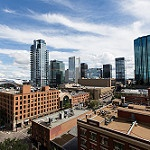

In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(building)

In [ ]:
import os

class_folder_paths = ['seg_train/seg_train/' + x for x in os.listdir('seg_train/seg_train/')]

In [ ]:
class_folder_paths

['seg_train/seg_train/forest',
 'seg_train/seg_train/street',
 'seg_train/seg_train/sea',
 'seg_train/seg_train/buildings',
 'seg_train/seg_train/mountain',
 'seg_train/seg_train/glacier']

In [ ]:
train_data_gen = ImageDataGenerator(horizontal_flip=True)
train_gen = train_data_gen.flow_from_directory('/content/seg_train/seg_train',
                                               target_size=(150, 150),
                                               color_mode='rgb',
                                               batch_size=32,
                                               class_mode='categorical',
                                               shuffle=True)

val_data_gen = ImageDataGenerator()
val_gen = val_data_gen.flow_from_directory('/content/seg_test/seg_test',
                                           target_size=(150, 150),
                                           color_mode='rgb',
                                           batch_size=32,
                                           class_mode='categorical',
                                           shuffle=False)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


### Transfer Learning

In [ ]:
before_mobilenet = Sequential([Input((150, 150, 3)),
                               Lambda(preprocess_input)])

mobilenet = MobileNetV2(input_shape=(150, 150, 3), include_top=False)

after_mobilenet = Sequential([GlobalAveragePooling2D(),
                              Dropout(0.3), # To prevent overfitting
                              Dense(6, activation='linear')])            

model = Sequential([before_mobilenet, mobilenet, after_mobilenet])

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.00001),
              loss=CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.build((None, 150, 150, 3)) 

In [ ]:
before_mobilenet.summary()
mobilenet.summary()
after_mobilenet.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 150, 150, 3)       0         
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 75, 75, 32)   864       

In [ ]:
early_stop = EarlyStopping(patience=3, monitor='accuracy') 

train_cb = ModelCheckpoint('model/', save_best_only=True)

model.fit(train_gen, validation_data=val_gen, callbacks=[early_stop, train_cb], epochs=100)

Epoch 1/100
439/439 [==============================] - ETA: 0s - loss: 1.0411 - accuracy: 0.6142

439/439 [==============================] - 80s 171ms/step - loss: 1.0411 - accuracy: 0.6142 - val_loss: 0.5851 - val_accuracy: 0.7760
Epoch 2/100
439/439 [==============================] - ETA: 0s - loss: 0.4532 - accuracy: 0.8393

439/439 [==============================] - 84s 191ms/step - loss: 0.4532 - accuracy: 0.8393 - val_loss: 0.4202 - val_accuracy: 0.8457
Epoch 3/100
439/439 [==============================] - ETA: 0s - loss: 0.3512 - accuracy: 0.8790

439/439 [==============================] - 71s 161ms/step - loss: 0.3512 - accuracy: 0.8790 - val_loss: 0.3029 - val_accuracy: 0.8927
Epoch 4/100
439/439 [==============================] - ETA: 0s - loss: 0.2974 - accuracy: 0.8963

439/439 [==============================] - 71s 162ms/step - loss: 0.2974 - accuracy: 0.8963 - val_loss: 0.2875 - val_accuracy: 0.8967
Epoch 5/100
439/439 [==============================] - ETA: 0s - loss: 0.2673 - accuracy: 0.9032

439/439 [==============================] - 70s 160ms/step - loss: 0.2673 - accuracy: 0.9032 - val_loss: 0.2458 - val_accuracy: 0.9153
Epoch 6/100
439/439 [==============================] - ETA: 0s - loss: 0.2365 - accuracy: 0.9157

439/439 [==============================] - 71s 162ms/step - loss: 0.2365 - accuracy: 0.9157 - val_loss: 0.2385 - val_accuracy: 0.9163
Epoch 7/100
439/439 [==============================] - ETA: 0s - loss: 0.2170 - accuracy: 0.9232

439/439 [==============================] - 71s 162ms/step - loss: 0.2170 - accuracy: 0.9232 - val_loss: 0.2258 - val_accuracy: 0.9203
Epoch 8/100
439/439 [==============================] - ETA: 0s - loss: 0.2015 - accuracy: 0.9289

439/439 [==============================] - 71s 161ms/step - loss: 0.2015 - accuracy: 0.9289 - val_loss: 0.2168 - val_accuracy: 0.9250
Epoch 9/100
439/439 [==============================] - ETA: 0s - loss: 0.1839 - accuracy: 0.9344

439/439 [==============================] - 71s 161ms/step - loss: 0.1839 - accuracy: 0.9344 - val_loss: 0.2091 - val_accuracy: 0.9283
Epoch 10/100
439/439 [==============================] - ETA: 0s - loss: 0.1683 - accuracy: 0.9403

439/439 [==============================] - 71s 162ms/step - loss: 0.1683 - accuracy: 0.9403 - val_loss: 0.2053 - val_accuracy: 0.9257
Epoch 11/100
439/439 [==============================] - ETA: 0s - loss: 0.1501 - accuracy: 0.9465

439/439 [==============================] - 70s 160ms/step - loss: 0.1501 - accuracy: 0.9465 - val_loss: 0.2037 - val_accuracy: 0.9277
Epoch 12/100
439/439 [==============================] - ETA: 0s - loss: 0.1375 - accuracy: 0.9510

439/439 [==============================] - 70s 161ms/step - loss: 0.1375 - accuracy: 0.9510 - val_loss: 0.2035 - val_accuracy: 0.9280
Epoch 13/100
439/439 [==============================] - 51s 116ms/step - loss: 0.1274 - accuracy: 0.9542 - val_loss: 0.2048 - val_accuracy: 0.9300
Epoch 14/100
439/439 [==============================] - ETA: 0s - loss: 0.1227 - accuracy: 0.9571

439/439 [==============================] - 71s 161ms/step - loss: 0.1227 - accuracy: 0.9571 - val_loss: 0.2030 - val_accuracy: 0.9287
Epoch 15/100
439/439 [==============================] - 51s 116ms/step - loss: 0.1037 - accuracy: 0.9650 - val_loss: 0.2069 - val_accuracy: 0.9283
Epoch 16/100
439/439 [==============================] - 50s 115ms/step - loss: 0.0931 - accuracy: 0.9676 - val_loss: 0.2073 - val_accuracy: 0.9310
Epoch 17/100
439/439 [==============================] - 51s 116ms/step - loss: 0.0875 - accuracy: 0.9710 - val_loss: 0.2126 - val_accuracy: 0.9310
Epoch 18/100
439/439 [==============================] - 51s 115ms/step - loss: 0.0782 - accuracy: 0.9747 - val_loss: 0.2129 - val_accuracy: 0.9317
Epoch 19/100
439/439 [==============================] - 51s 116ms/step - loss: 0.0735 - accuracy: 0.9756 - val_loss: 0.2174 - val_accuracy: 0.9297
Epoch 20/100
439/439 [==============================] - 51s 117ms/step - loss: 0.0630 - accuracy: 0.9789 - val_loss: 0.2219 - val_a

In [ ]:
model.evaluate(val_gen)

94/94 [==============================] - 4s 47ms/step - loss: 0.3171 - accuracy: 0.9243


[0.31713730096817017, 0.9243333339691162]

In [ ]:
# Instead of using this massive library (tensorflow), we'll use tensorflow lite. It's a lot better.
converter = tf.lite.TFLiteConverter.from_keras_model(model)  

tflite_model = converter.convert()
tflite_model

In [ ]:
with open('model.tflite', 'wb') as f:
    f.write(tflite_model) # It's going to be very very small file

In [5]:
inp1 = cv2.imread('seg_test/seg_test/forest/20056.jpg')
inp2 = cv2.imread('seg_test/seg_test/forest/20062.jpg')

inps = [inp1, inp2]
inps

[array([[[ 37,  41,  30],
         [ 61,  71,  59],
         [ 77,  96,  81],
         ...,
         [ 95, 122,  96],
         [ 90, 120,  91],
         [ 93, 123,  94]],
 
        [[ 79,  92,  78],
         [ 50,  69,  54],
         [ 47,  77,  58],
         ...,
         [ 87, 113,  90],
         [ 89, 115,  91],
         [ 78, 104,  80]],
 
        [[ 29,  61,  42],
         [ 18,  56,  34],
         [ 52, 100,  74],
         ...,
         [ 88, 106,  93],
         [ 94, 113,  98],
         [ 90, 109,  94]],
 
        ...,
 
        [[111, 117, 124],
         [112, 118, 125],
         [ 97, 101, 106],
         ...,
         [108, 111, 116],
         [126, 125, 134],
         [ 86,  86,  92]],
 
        [[ 89,  92, 100],
         [ 92,  95, 103],
         [101, 104, 109],
         ...,
         [ 99, 101, 109],
         [118, 117, 127],
         [ 94,  93, 102]],
 
        [[122, 125, 133],
         [133, 136, 144],
         [129, 132, 137],
         ...,
         [144, 145, 155],
  

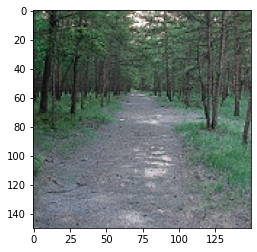

In [6]:
plt.imshow(inp1);

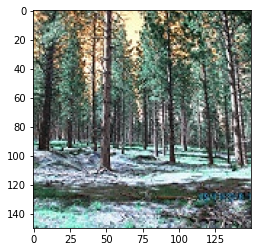

In [7]:
plt.imshow(inp2); # We have to convert the color mode of input images to RGB 

In [8]:
inps = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in inps]

inps

[array([[[ 30,  41,  37],
         [ 59,  71,  61],
         [ 81,  96,  77],
         ...,
         [ 96, 122,  95],
         [ 91, 120,  90],
         [ 94, 123,  93]],
 
        [[ 78,  92,  79],
         [ 54,  69,  50],
         [ 58,  77,  47],
         ...,
         [ 90, 113,  87],
         [ 91, 115,  89],
         [ 80, 104,  78]],
 
        [[ 42,  61,  29],
         [ 34,  56,  18],
         [ 74, 100,  52],
         ...,
         [ 93, 106,  88],
         [ 98, 113,  94],
         [ 94, 109,  90]],
 
        ...,
 
        [[124, 117, 111],
         [125, 118, 112],
         [106, 101,  97],
         ...,
         [116, 111, 108],
         [134, 125, 126],
         [ 92,  86,  86]],
 
        [[100,  92,  89],
         [103,  95,  92],
         [109, 104, 101],
         ...,
         [109, 101,  99],
         [127, 117, 118],
         [102,  93,  94]],
 
        [[133, 125, 122],
         [144, 136, 133],
         [137, 132, 129],
         ...,
         [155, 145, 144],
  

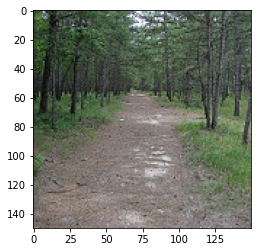

In [9]:
plt.imshow(inps[0]); # This looks a lot more like a forest

In [10]:
inps = np.array(inps)

In [1]:
!pip install tflite_runtime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 76.5 MB/s eta 0:00:00


In [11]:
import tflite_runtime.interpreter as tflite 


model = tflite.Interpreter('model.tflite')

In [12]:
model.allocate_tensors()

input_details = model.get_input_details()
input_details # checking the output. We are going to use that in the fastapi_.py file

[{'name': 'serving_default_sequential_3_input:0',
  'index': 0,
  'shape': array([  1, 150, 150,   3], dtype=int32),
  'shape_signature': array([ -1, 150, 150,   3], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [13]:
output_details = model.get_output_details()
output_details

[{'name': 'StatefulPartitionedCall:0',
  'index': 181,
  'shape': array([1, 6], dtype=int32),
  'shape_signature': array([-1,  6], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [14]:
# Function to get class prediction

def model_predict(img_arr):
    predictions = [0] * len(img_arr)

    for i, val in enumerate(predictions):
        model.set_tensor(input_details[0]['index'], img_arr[i].reshape((1, 150, 150, 3)))
        model.invoke()
        predictions[i] = model.get_tensor(output_details[0]['index']).reshape((6,))
    
    prediction_prob = np.array(predictions)
    argmaxs = np.argmax(prediction_prob, axis=1)

    return argmaxs

In [15]:
model_predict(inps.astype(np.float32)) # 1 means forest

array([1, 1])